In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
data=pd.read_csv("data.csv")

In [63]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [64]:
data.Marital_Status.unique()

array([0, 1], dtype=int64)

## Exploratory Data Analysis

### i) Handling Outliers

In [65]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


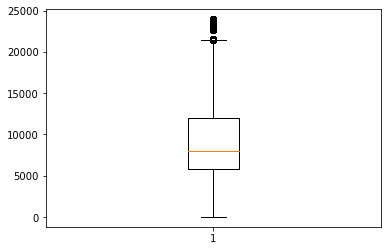

In [66]:
plt.boxplot(data.Purchase)
plt.show()

In [67]:
q1=data.Purchase.quantile(0.25)
q3=data.Purchase.quantile(0.75)

iqr=q3-q1

ll=q1-1.5*iqr
ul=q3+1.5*iqr

In [68]:
print(ll," ",ul)

-3523.5   21400.5


In [69]:
import warnings 

warnings.filterwarnings("ignore")
data.Purchase[data.Purchase>ul]=ul

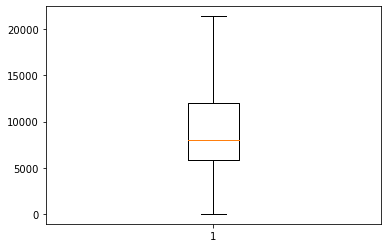

In [70]:
plt.boxplot(data.Purchase)
plt.show()

### Remove outliers pernamently

In [71]:
data.Purchase.clip(upper=ul,inplace=True)

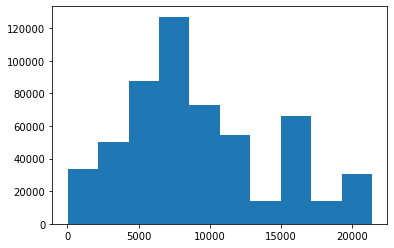

In [72]:
plt.hist(data.Purchase)
plt.show()

<AxesSubplot:ylabel='Purchase'>

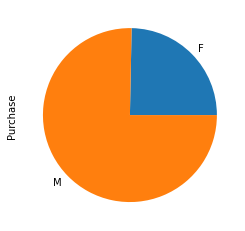

In [73]:
data.groupby("Gender").count().Purchase.plot(kind="pie")


<AxesSubplot:xlabel='Gender'>

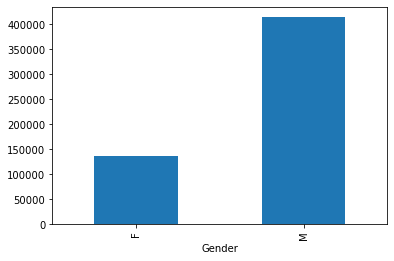

In [74]:
data.groupby("Gender").count().Purchase.plot(kind="bar")


<AxesSubplot:xlabel='City_Category'>

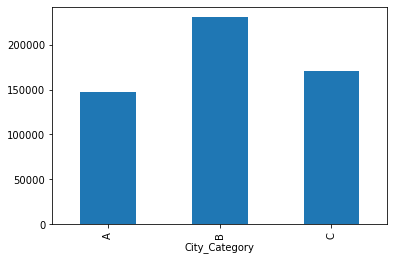

In [75]:
data.groupby("City_Category").count().Purchase.plot(kind="bar")


<AxesSubplot:xlabel='Product_Category_1'>

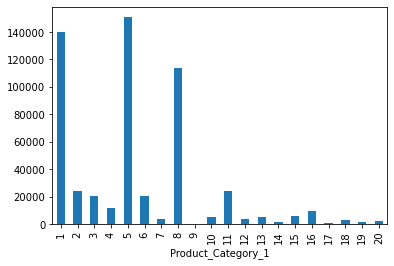

In [76]:
data.groupby("Product_Category_1").count().Purchase.plot(kind="bar")


<AxesSubplot:xlabel='Age'>

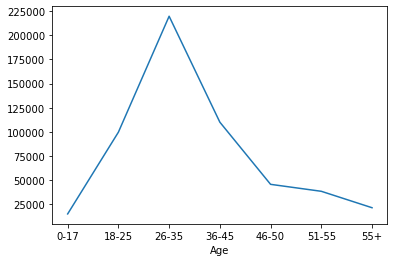

In [77]:
data.groupby("Age").count().Purchase.plot(kind="line")


In [78]:
import seaborn as sns

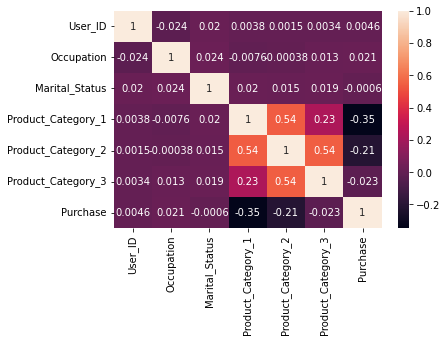

In [85]:
data.corr()
sns.heatmap(data.corr(),annot=True)
plt.show()